In [1]:
from shap.datasets import adult

X, y = adult()

print(X)
print(y)

        Age  Workclass  Education-Num  Marital Status  Occupation  \
0      39.0          7           13.0               4           1   
1      50.0          6           13.0               2           4   
2      38.0          4            9.0               0           6   
3      53.0          4            7.0               2           6   
4      28.0          4           13.0               2          10   
...     ...        ...            ...             ...         ...   
32556  27.0          4           12.0               2          13   
32557  40.0          4            9.0               2           7   
32558  58.0          4            9.0               6           1   
32559  22.0          4            9.0               4           1   
32560  52.0          5            9.0               2           4   

       Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
0                 0     4    1        2174.0           0.0            40.0   
1              

In [2]:
numerical_columns = ['Age','Education-Num','Capital Gain','Capital Loss','Hours per week'] 
categorical_columns = ['Workclass','Marital Status','Occupation','Relationship','Race','Sex','Country'] 


## Conversion of categorical data

In [3]:
import pandas as pd # for one-hot encoding

from sklearn.preprocessing import StandardScaler # for normalization

In [4]:
# Normalization of numerical data
for column in numerical_columns:
    scaler = StandardScaler()
    X[column] = scaler.fit_transform(X[column].values.reshape(-1,1))

print(X)

            Age  Workclass  Education-Num  Marital Status  Occupation  \
0      0.030671          7       1.134739               4           1   
1      0.837109          6       1.134739               2           4   
2     -0.042642          4      -0.420060               0           6   
3      1.057047          4      -1.197459               2           6   
4     -0.775768          4       1.134739               2          10   
...         ...        ...            ...             ...         ...   
32556 -0.849080          4       0.746039               2          13   
32557  0.103983          4      -0.420060               2           7   
32558  1.423610          4      -0.420060               6           1   
32559 -1.215643          4      -0.420060               4           1   
32560  0.983734          5      -0.420060               2           4   

       Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
0                 0     4    1      0.148453 

In [5]:
# Data type change of categorical data  
for column in categorical_columns:
    X[column] = X[column].astype('category')

print(X)

            Age Workclass  Education-Num Marital Status Occupation  \
0      0.030671         7       1.134739              4          1   
1      0.837109         6       1.134739              2          4   
2     -0.042642         4      -0.420060              0          6   
3      1.057047         4      -1.197459              2          6   
4     -0.775768         4       1.134739              2         10   
...         ...       ...            ...            ...        ...   
32556 -0.849080         4       0.746039              2         13   
32557  0.103983         4      -0.420060              2          7   
32558  1.423610         4      -0.420060              6          1   
32559 -1.215643         4      -0.420060              4          1   
32560  0.983734         5      -0.420060              2          4   

      Relationship Race Sex  Capital Gain  Capital Loss  Hours per week  \
0                0    4   1      0.148453      -0.21666       -0.035429   
1        

In [6]:
# One-hot encoding of categorical data
X = pd.get_dummies(X) 

# Conversion of data frame to numpy
X = X.values

# Converision: {False, True} --> {0., 1.}
y = y.astype(float) 

In [7]:
print(X.shape)
print(y.shape)
print(y)

(32561, 91)
(32561,)
[0. 0. 0. ... 0. 0. 1.]


## train-val-test split

In [8]:
from sklearn.model_selection import train_test_split

X_,X_test,y_,y_test = train_test_split(X,y,test_size=1/10,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_,y_,test_size=1/9,stratify=y_)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(26048, 91)
(3256, 91)
(3257, 91)


## Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model_LR = LogisticRegression()

# training
model_LR.fit(X_train, y_train)

# evaulation
val_acc = model_LR.score(X_val, y_val) 

print(val_acc)

0.8541154791154791


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [11]:
from joblib import dump

dump(model_LR, 'LR_sample.joblib')

['LR_sample.joblib']

In [12]:
from joblib import load

load('LR_sample.joblib')

LogisticRegression()

## A 2-layer DNN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.01,
          beta_1 = 0.9,
          beta_2 = 0.999)


#model.compile(optimizer=opt,
#             loss='binary_crossentropy')


model.compile(optimizer=opt,
             loss='binary_crossentropy',
             metrics=['acc'])

model.fit(X_train,y_train, epochs=10)

Epoch 1/10
814/814 [==============================] - 3s 2ms/step - loss: 0.3232 - acc: 0.8516
Epoch 2/10
814/814 [==============================] - 2s 2ms/step - loss: 0.3138 - acc: 0.8529
Epoch 3/10
814/814 [==============================] - 2s 2ms/step - loss: 0.3065 - acc: 0.8579
Epoch 4/10
814/814 [==============================] - 2s 3ms/step - loss: 0.3027 - acc: 0.8590
Epoch 5/10
814/814 [==============================] - 2s 3ms/step - loss: 0.2979 - acc: 0.8612
Epoch 6/10
814/814 [==============================] - 2s 3ms/step - loss: 0.2940 - acc: 0.8613
Epoch 7/10
814/814 [==============================] - 2s 3ms/step - loss: 0.2905 - acc: 0.8660
Epoch 8/10
814/814 [==============================] - 2s 2ms/step - loss: 0.2864 - acc: 0.8664
Epoch 9/10
814/814 [==============================] - 2s 3ms/step - loss: 0.2831 - acc: 0.8674
Epoch 10/10
814/814 [==============================] - 2s 3ms/step - loss: 0.2817 - acc: 0.8689


In [14]:
val_hist = model.evaluate(X_val,y_val)

print(val_hist)

102/102 [==============================] - 1s 4ms/step - loss: 0.3328 - acc: 0.8600
[0.3327931761741638, 0.859950840473175]


## Regularization

In [15]:
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Dense(128,
          kernel_regularizer=l2(0.01),
          bias_regularizer=l2(0.01)))

## Early stopping

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128,kernel_regularizer=l2(0.01),
          bias_regularizer=l2(0.01),      
          activation='relu'))
model.add(Dense(1,kernel_regularizer=l2(0.01),
          bias_regularizer=l2(0.01),        
          activation='sigmoid'))
opt = Adam(learning_rate=0.01,beta_1 = 0.9,beta_2 = 0.999)
model.compile(optimizer=opt,
             loss='binary_crossentropy')

#model.compile(optimizer=opt,
#             loss='binary_crossentropy',
#             metrics=['acc'])

#es_callback = EarlyStopping(monitor='val_acc', patience=15) 
#es_callback = EarlyStopping(monitor='val_loss', patience=15) 
es_callback = EarlyStopping(monitor='val_loss', patience=15) 


hist = model.fit(X_train, y_train, 
                 validation_data=(X_val, y_val), 
                 epochs=100,callbacks=[es_callback]) 

Epoch 1/100
814/814 [==============================] - 4s 4ms/step - loss: 0.4216 - val_loss: 0.3996
Epoch 2/100
814/814 [==============================] - 3s 3ms/step - loss: 0.4030 - val_loss: 0.4026
Epoch 3/100
814/814 [==============================] - 2s 2ms/step - loss: 0.4030 - val_loss: 0.3996
Epoch 4/100
814/814 [==============================] - 2s 2ms/step - loss: 0.3999 - val_loss: 0.4011
Epoch 5/100
814/814 [==============================] - 2s 2ms/step - loss: 0.4002 - val_loss: 0.4001
Epoch 6/100
814/814 [==============================] - 2s 3ms/step - loss: 0.3978 - val_loss: 0.4024
Epoch 7/100
814/814 [==============================] - 2s 2ms/step - loss: 0.3986 - val_loss: 0.3934
Epoch 8/100
814/814 [==============================] - 2s 3ms/step - loss: 0.3986 - val_loss: 0.3961
Epoch 9/100
814/814 [==============================] - 2s 2ms/step - loss: 0.3975 - val_loss: 0.4015
Epoch 10/100
814/814 [==============================] - 2s 3ms/step - loss: 0.3978 - val_lo

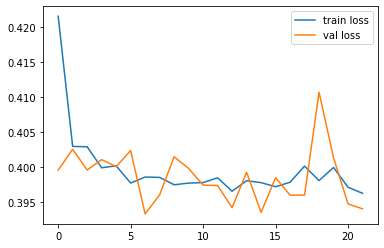

In [17]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
#train_acc = hist.history['acc']
#val_acc = hist.history['val_acc']

import matplotlib.pyplot as plt

plt.plot(train_loss,label='train loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()

## Dropout

In [18]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128,kernel_regularizer=l2(0.01),
          bias_regularizer=l2(0.01),      
          activation='relu'))

model.add(Dropout(0.9))

## Weight initialization

In [19]:
from tensorflow.keras.initializers import HeNormal

init = HeNormal()

model.add(Dense(128,kernel_regularizer=l2(0.01),
          bias_regularizer=l2(0.01),
          kernel_initializer=init,
          activation='relu'))

## Batch normalization

In [20]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import ReLU

init = HeNormal()

model.add(Dense(128,kernel_regularizer=l2(0.01),
          bias_regularizer=l2(0.01),
          kernel_initializer=init))

model.add(BatchNormalization())

model.add(ReLU())

## Learning rate decaying

In [21]:
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler

init = HeNormal()

model = Sequential()
model.add(Dense(128,kernel_regularizer=l2(0.01),
          bias_regularizer=l2(0.01),
          kernel_initializer=init))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

opt = Adam(learning_rate=0.01,beta_1 = 0.9,beta_2 = 0.999)
#model.compile(optimizer=opt,
#             loss='binary_crossentropy',
#             metrics=['acc'])
model.compile(optimizer=opt,
             loss='binary_crossentropy')

es_callback = EarlyStopping(monitor='val_loss', patience=15) 
#es_callback = EarlyStopping(monitor='val_acc', patience=15) 

def scheduler(epoch, lr):
    if epoch in [20,40,60]:
        lr = 0.1*lr
    else:
        lr = lr
    return lr

ls_callback = LearningRateScheduler(scheduler) 


hist = model.fit(X_train, y_train, 
                 validation_data=(X_val, y_val), 
                 epochs=100, callbacks=[es_callback,ls_callback]) 

Epoch 1/100
814/814 [==============================] - 3s 3ms/step - loss: 0.4951 - val_loss: 0.4659 - lr: 0.0100
Epoch 2/100
814/814 [==============================] - 2s 3ms/step - loss: 0.4420 - val_loss: 0.4038 - lr: 0.0100
Epoch 3/100
814/814 [==============================] - 2s 3ms/step - loss: 0.4307 - val_loss: 0.4165 - lr: 0.0100
Epoch 4/100
814/814 [==============================] - 3s 3ms/step - loss: 0.4267 - val_loss: 0.4006 - lr: 0.0100
Epoch 5/100
814/814 [==============================] - 2s 3ms/step - loss: 0.4259 - val_loss: 0.4203 - lr: 0.0100
Epoch 6/100
814/814 [==============================] - 2s 3ms/step - loss: 0.4253 - val_loss: 0.4111 - lr: 0.0100
Epoch 7/100
814/814 [==============================] - 2s 3ms/step - loss: 0.4245 - val_loss: 0.3966 - lr: 0.0100
Epoch 8/100
814/814 [==============================] - 3s 3ms/step - loss: 0.4228 - val_loss: 0.3943 - lr: 0.0100
Epoch 9/100
814/814 [==============================] - 3s 3ms/step - loss: 0.4227 - val_

814/814 [==============================] - 3s 3ms/step - loss: 0.3249 - val_loss: 0.3210 - lr: 1.0000e-05
Epoch 71/100
814/814 [==============================] - 3s 3ms/step - loss: 0.3267 - val_loss: 0.3205 - lr: 1.0000e-05
Epoch 72/100
814/814 [==============================] - 3s 4ms/step - loss: 0.3216 - val_loss: 0.3220 - lr: 1.0000e-05
Epoch 73/100
814/814 [==============================] - 2s 3ms/step - loss: 0.3207 - val_loss: 0.3200 - lr: 1.0000e-05
Epoch 74/100
814/814 [==============================] - 3s 4ms/step - loss: 0.3244 - val_loss: 0.3211 - lr: 1.0000e-05
Epoch 75/100
814/814 [==============================] - 3s 3ms/step - loss: 0.3245 - val_loss: 0.3216 - lr: 1.0000e-05
Epoch 76/100
814/814 [==============================] - 3s 3ms/step - loss: 0.3236 - val_loss: 0.3193 - lr: 1.0000e-05
Epoch 77/100
814/814 [==============================] - 3s 4ms/step - loss: 0.3239 - val_loss: 0.3218 - lr: 1.0000e-05
Epoch 78/100
814/814 [==============================] - 3s 4m

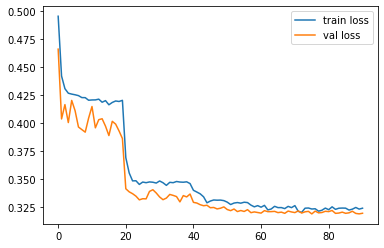

In [22]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
#train_acc = hist.history['acc']
#val_acc = hist.history['val_acc']

import matplotlib.pyplot as plt

plt.plot(train_loss,label='train loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()